In [14]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [15]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + TOPIC AND SENTIMENT INTENSITY + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,Number of Posts,Number of Comments,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,403,3049,98.4,53.3,109,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,357,3211,90.8,53.0,108,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,344,3153,89.5,53.4,106,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,338,3184,82.6,56.4,106,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,369,2964,79.8,57.2,106,Train


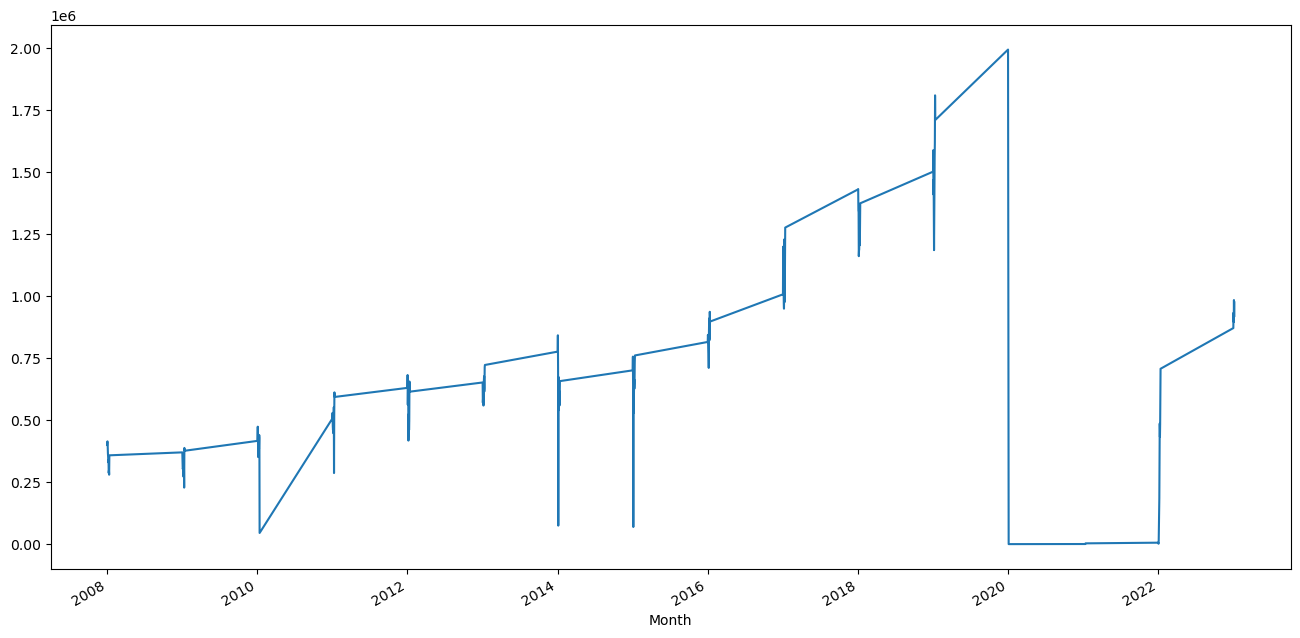

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [17]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [18]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5062.559, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5058.682, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5059.447, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5059.222, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5056.726, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5057.622, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5057.310, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5058.795, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5060.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5060.497, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5062.493, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.204 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
train = df1['Tourist Arrival'][:'01/04/2020'].dropna()
test = df1['Tourist Arrival']['01/05/2020':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/04/2020'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/05/2020':].dropna()

In [20]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22726D+01    |proj g|=  9.15726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19      4      8      1     0     0   1.948D-06   1.227D+01
  F =   12.272394144394884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  148
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1816.314
Date:                            Wed, 23 Aug 2023   AIC                           3670.629
Time:                                    21:18:18   BIC                           3725.829
Sample:                                         0   HQIC                          3693.060
                                            - 148                                         
Covariance Type:                              opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
NegativityQDAP      2.167e+05   1.53e+05      1.414      0.157   -8.37e+04    5.17e+05
PositivityQDAP     -1.347e+04   1.66e+05     -0.081      0.935   -3.39e+05    3.12e+05
TOPIC 1            -1.674e+05   3.36e+05     -0.499      0.618   -8.25e+05     4.9e+05
TOPIC 2             -2.68e+05   6.89e+04     -3.887      0.000   -4.03e+05   -1.33e+05
TOPIC 3            -6.155e+04   7.82e+04     -0.787      0.431   -2.15e+05    9.17e+04
TOPIC 4            -1.202e+05   5.85e+04     -2.054      0.040   -2.35e+05   -5493.685
TOPIC 5            -4.834e+04   7.34e+04     -0.659      0.510   -1.92e+05    9.55e+04
TOPIC 6            -1.172e+05   1.96e+05     -0.598      0.550   -5.01e+05    2.67e+05
TOPIC 7            -1.105e+05   4.68e+04     -2.362      0.018   -2.02e+05   -1.88e+04
TOPIC 8            -8.337e+04   4.98e+04     -1.675      0.094   -1.81e+05    1.42e+04
TOPIC 9            -1.411e+05    4.3e+04     -3.281      0.001   -2.25e+05   -5.68e+04
TOPIC 10           -8.631e+04   9.52e+04     -0.907      0.365   -2.73e+05       1e+05
Number of Posts      -28.3900    443.902     -0.064      0.949    -898.422     841.642
Number of Comments    31.0189     48.825      0.635      0.525     -64.676     126.714
CCI                 9663.1248   4128.422      2.341      0.019    1571.566    1.78e+04
PMI                 5280.9955   6497.733      0.813      0.416   -7454.326     1.8e+04
REERI              -3.371e+04   9323.624     -3.615      0.000    -5.2e+04   -1.54e+04
ar.S.L12               0.1853      0.104      1.777      0.076      -0.019       0.390
sigma2              2.844e+10      1.872   1.52e+10      0.000    2.84e+10    2.84e+10
===================================================================================
Ljung-Box (L1) (Q):                   4.77   Jarque-Bera (JB):               131.39
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.62e+25. Standard errors may be unstable.
"""

In [21]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 599886.3161284003


In [24]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 552061.0539928488


In [25]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.3567655047319257e+21


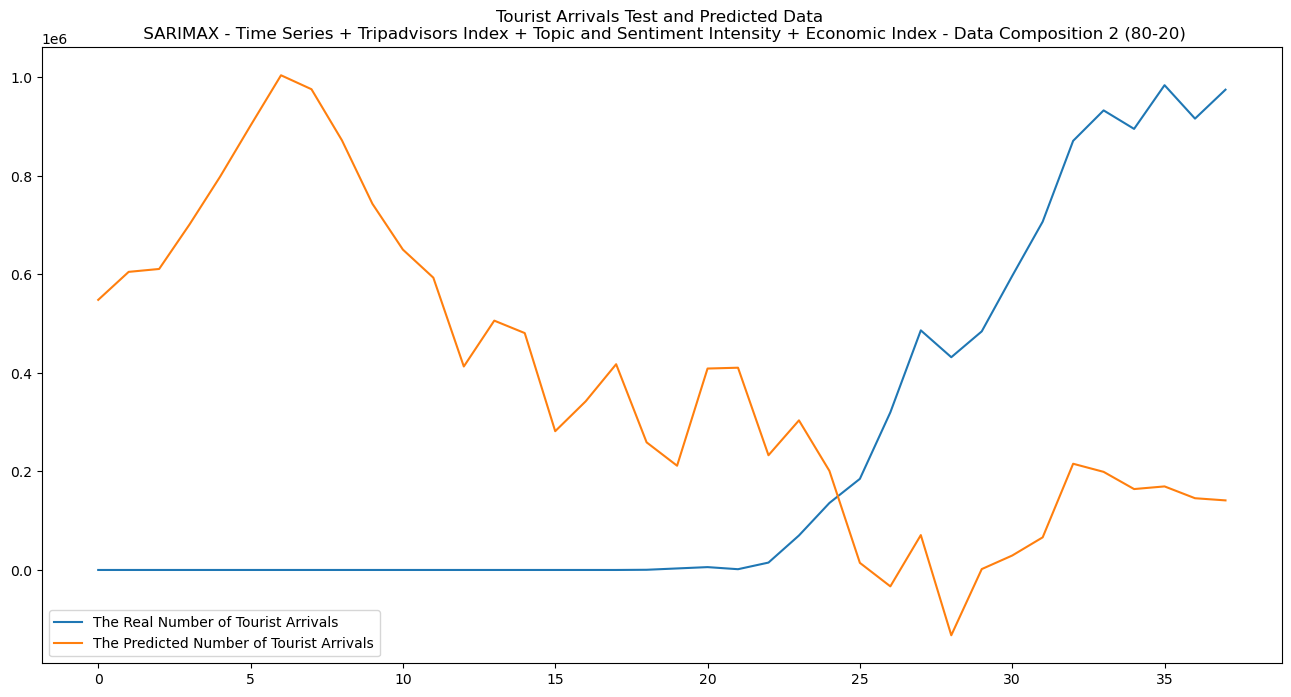

In [26]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Topic and Sentiment Intensity + Economic Index - Data Composition 2 (80-20)")
plt.legend()
plt.show()